In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("../input/big-mart-salescsv/Train_UWu5bXk.csv")
test_data = pd.read_csv("../input/big-mart-salescsv/Test_u94Q5KV.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.drop('Item_Identifier',axis=1,inplace=True)
test_data.drop('Item_Identifier',axis=1,inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


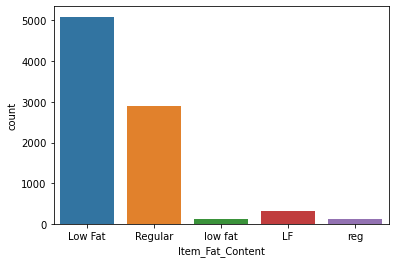

In [8]:
sns.countplot(x='Item_Fat_Content',data=train_data);

In [9]:
def clean_col(col):
    if(col=="low fat" or col=="LF"):
        return "Low Fat"
    elif(col=="reg"):
        return "Regular"
    else:
        return col

In [10]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].apply(clean_col)

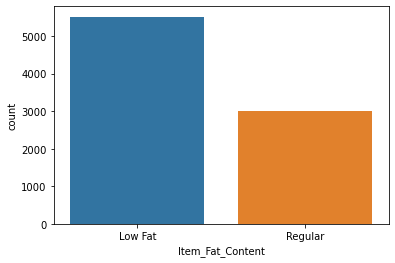

In [11]:
sns.countplot(x='Item_Fat_Content',data=train_data)

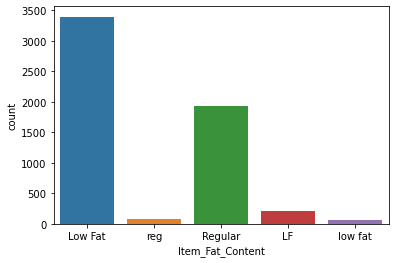

In [12]:
sns.countplot(x='Item_Fat_Content',data=test_data)

In [13]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].apply(clean_col)

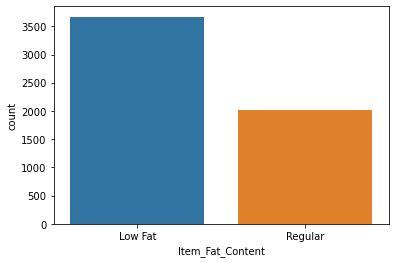

In [14]:
sns.countplot(x='Item_Fat_Content',data=test_data)

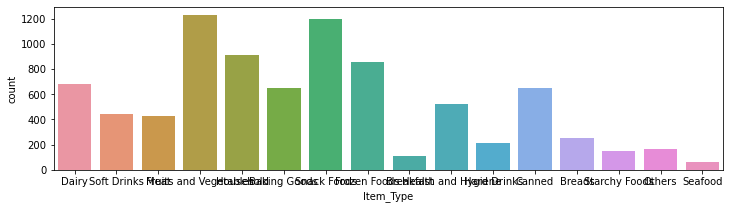

In [15]:
plt.figure(figsize=(12,3))
sns.countplot(x='Item_Type',data=train_data)

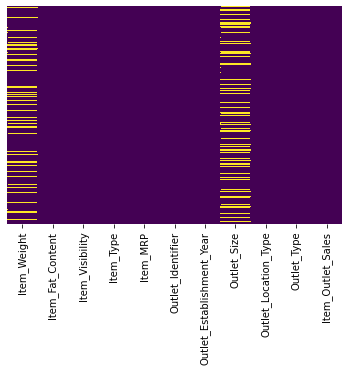

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train_data.drop('Outlet_Identifier',axis=1,inplace=True)
test_data.drop('Outlet_Identifier',axis=1,inplace=True)

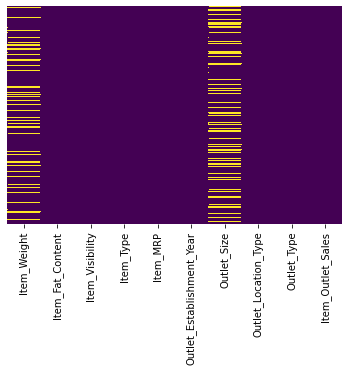

In [18]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

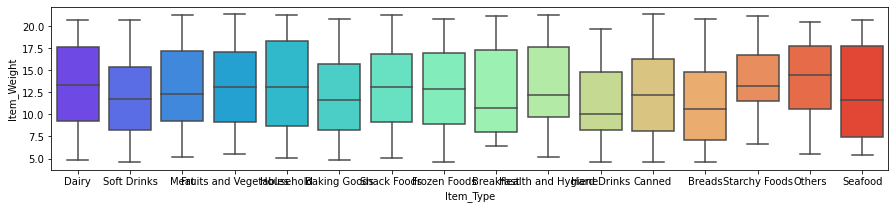

In [19]:
plt.figure(figsize=(15,3))
sns.boxplot(x="Item_Type", y="Item_Weight", data=train_data,palette='rainbow')

In [20]:
train_data.groupby('Item_Type').mean()['Item_Weight']

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [21]:
def fill_null(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=train_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [22]:
train_data = train_data.apply(fill_null,axis=1)

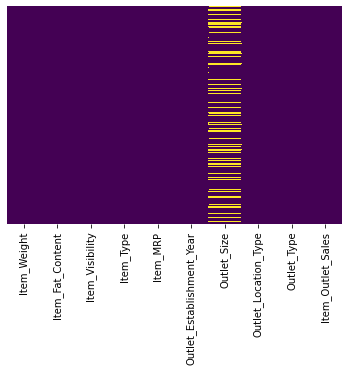

In [23]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

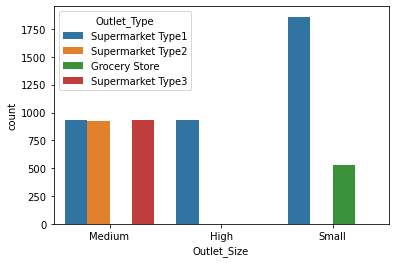

In [24]:
sns.countplot(x='Outlet_Size',data=train_data,hue='Outlet_Type')

In [25]:
def fill_size(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [26]:
train_data = train_data.apply(fill_size,axis=1)

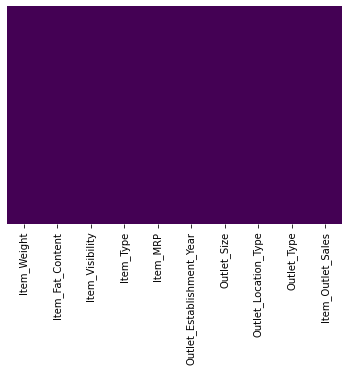

In [27]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

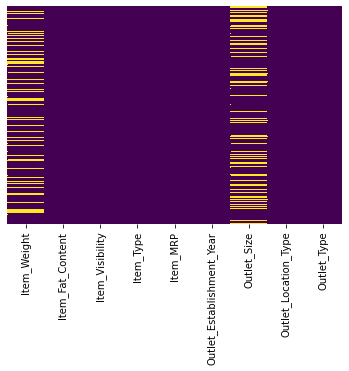

In [28]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
def fill_null2(row):
    if(pd.isnull(row['Item_Weight'])):
        row['Item_Weight']=test_data.groupby('Item_Type').mean()['Item_Weight'][row['Item_Type']]
        return row
    else:
        return row

In [30]:
test_data = test_data.apply(fill_null2,axis=1)

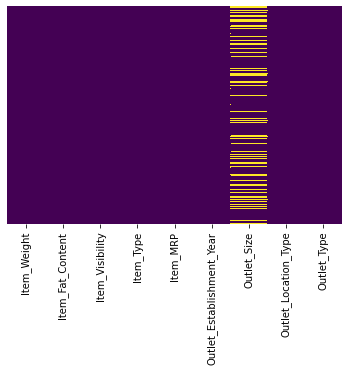

In [31]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

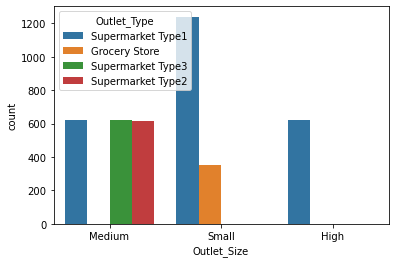

In [32]:
sns.countplot(x='Outlet_Size',data=test_data,hue='Outlet_Type')

In [33]:
def fill_size2(row):
    if(pd.isnull(row['Outlet_Size'])):
        if(row['Outlet_Type']=="Supermarket Type1"):
            row['Outlet_Size']="Small"
            return row
        elif(row['Outlet_Type']=="Supermarket Type2"):
            row['Outlet_Size']="Medium"
            return row
        elif(row['Outlet_Type']=="Supermarket Type3"):
            row['Outlet_Size']="Medium"
            return row
        else:
            row['Outlet_Size']="Small"
            return row
    else:
       return row

In [34]:
test_data = test_data.apply(fill_size2,axis=1)

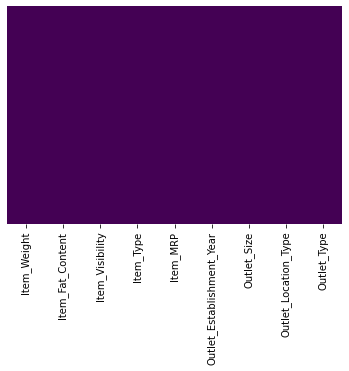

In [35]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
data_types = train_data.dtypes
for cols in train_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(train_data[cols],drop_first=True)
        train_data.drop(cols,axis=1,inplace=True)
        train_data = pd.concat([train_data,temp],axis=1)
#data.head()

In [37]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [38]:
data_types = test_data.dtypes
for cols in test_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(test_data[cols],drop_first=True)
        test_data.drop(cols,axis=1,inplace=True)
        test_data = pd.concat([test_data,temp],axis=1)

In [39]:
test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.75000,0.007565,107.8622,1999,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,8.30000,0.038428,87.3198,2007,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.60000,0.099575,241.7538,1998,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,7.31500,0.015388,155.0340,2007,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
4,12.95504,0.118599,234.2300,1985,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [40]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(train_data.drop('Item_Outlet_Sales',axis=1),train_data['Item_Outlet_Sales'])

DecisionTreeRegressor()

In [41]:
X_train = train_data.drop('Item_Outlet_Sales',axis=1)
y_train = train_data['Item_Outlet_Sales']
print("Training Accuracy for Decision Tree regressor :", regr.score(X_train, y_train))

Training Accuracy for Decision Tree regressor : 1.0


In [42]:
predictions = regr.predict(test_data)

In [43]:
pd.Series(predictions)

0       2087.2830
1       1328.2710
2        759.0120
3       1794.3310
4       7170.6660
          ...    
5676    3829.0158
5677    2181.1608
5678     361.5294
5679    7247.2330
5680     792.3020
Length: 5681, dtype: float64

# Conclusion

After a whole lot of preprocessiong we were finally able to deveop a dataset which was good enough for our model to run. I didn't explain anything step wise but a lot of it is self explanatory. If you liked my notebook pls leave an upvote and if you have any suggestions mention them in the comments too. Cheers!